# Project 1
#### Performing Analysis of Meteorological Data - By Sudeesh Reddy
Objective: Perform Data Cleaning, Perform Analysis for Testing the (given) Hypothesisand finally put-forth your conclusion by writing a blog article.

Data Source : https://www.kaggle.com/muthuj7/weather-dataset

The Meteorological Dataset Consists of:

Total Number of Data Point: 96453

Total Number of Attribute/Columns in data set is 11.

Attribute Information:

* Formatted Date
* Summary
* Precip Type
* Temperature (C)
* Apparent Temperature (C)
* Humidity
* Wind Speed (km/h)
* Wind Bearing (degrees)
* Visibility (km)
* Pressure (millibars)
* Daily Summary
### Loading the Data

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Load weatherHistory.csv into a pandas dataFrame.
weather= pd.read_csv("weatherHistory.csv")
weather.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


#### No of data-points, No of features

In [52]:
print (weather.shape)

(96453, 11)


#### Name of the columns in the data set

In [53]:
print(weather.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')


In [54]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


### Statistical info of data frame

In [55]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


#### Missing Values on Dataset from String to Date Time

In [56]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

### Observation:
*  There are 517 missing values in 'Precip Type'.
* 'Wind Bearing (degrees)' = integer values & Formatted Date = String.
* Minimum values of Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km) are Zero and they can be Zero.

### Changing Formatted Date from String to Datetime

In [57]:
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'], utc=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  int64              
 8   Visibility (km)           96453 non-null  float64            
 9   Pressure (millibars)      96453 non-null  float64            
 10  Daily Summary             96453 non-null  object             
dtypes: datetime64[n

### Checking Wheather this dataset has Duplicate Values or not

In [58]:
sum(weather.duplicated())

24

## Explortary Data Analysis(EDA):
### Data Cleaning:

#### Number of Distinct Observation

In [59]:
 weather.nunique()

Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64

In [60]:
#DataFrame for Duplicate Values
weather_duplicated = weather[weather.duplicated()]
weather_duplicated

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
36072,2010-08-01 22:00:00+00:00,Clear,rain,18.800000,18.800000,0.93,6.2790,270,14.9086,1016.99,Partly cloudy starting in the afternoon contin...
36073,2010-08-01 23:00:00+00:00,Clear,rain,18.222222,18.222222,0.97,6.2790,291,14.9086,1017.09,Partly cloudy starting in the afternoon contin...
36074,2010-08-02 00:00:00+00:00,Clear,rain,18.072222,18.072222,0.98,11.2700,290,6.8425,1013.23,Partly cloudy starting in the afternoon contin...
36075,2010-08-02 01:00:00+00:00,Clear,rain,16.622222,16.622222,0.99,6.4400,300,11.9784,1016.78,Partly cloudy starting in the afternoon contin...
36076,2010-08-02 02:00:00+00:00,Clear,rain,16.094444,16.094444,0.99,3.0751,280,11.9784,1016.67,Partly cloudy starting in the afternoon contin...
36077,2010-08-02 03:00:00+00:00,Clear,rain,15.955556,15.955556,0.99,3.8801,276,9.9820,1016.69,Partly cloudy starting in the afternoon contin...
36078,2010-08-02 04:00:00+00:00,Clear,rain,17.088889,17.088889,1.00,6.4400,310,9.9820,1017.08,Partly cloudy starting in the afternoon contin...
36079,2010-08-02 05:00:00+00:00,Clear,rain,20.822222,20.822222,0.87,3.2200,300,9.9820,1017.27,Partly cloudy starting in the afternoon contin...
36080,2010-08-02 06:00:00+00:00,Clear,rain,23.405556,23.405556,0.74,1.8837,334,9.9820,1017.27,Partly cloudy starting in the afternoon contin...
36081,2010-08-02 07:00:00+00:00,Clear,rain,26.050000,26.050000,0.59,1.5939,5,9.9820,1017.15,Partly cloudy starting in the afternoon contin...


In [61]:
weather_duplicated.shape

(24, 11)

### Observation:
There are no Duplicate Values in this Dataset.

### DataFrame for only NaN Values for exploration.

In [62]:
weather_null = weather[weather.isna().any(axis=1)]
weather_null.head(20)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
52672,2012-04-11 14:00:00+00:00,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163,9.9820,1002.40,Mostly cloudy until night.
52674,2012-04-11 16:00:00+00:00,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169,9.9820,1001.79,Mostly cloudy until night.
52675,2012-04-11 17:00:00+00:00,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151,9.9820,1001.60,Mostly cloudy until night.
52677,2012-04-11 19:00:00+00:00,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159,9.9820,1001.92,Mostly cloudy until night.
52678,2012-04-11 20:00:00+00:00,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197,16.1000,1002.20,Mostly cloudy until night.
52680,2012-04-11 22:00:00+00:00,Mostly Cloudy,NaN,10.100000,10.100000,0.61,11.3666,180,16.1000,1002.25,Light rain in the morning.
52681,2012-04-11 23:00:00+00:00,Partly Cloudy,NaN,10.183333,10.183333,0.64,7.2128,150,16.1000,1002.05,Light rain in the morning.
52683,2012-04-12 01:00:00+00:00,Mostly Cloudy,NaN,10.700000,10.700000,0.70,14.6993,133,16.1000,1001.42,Light rain in the morning.
52684,2012-04-12 02:00:00+00:00,Partly Cloudy,NaN,9.744444,8.022222,0.73,11.9623,142,16.1000,1001.11,Light rain in the morning.
52687,2012-04-12 05:00:00+00:00,Mostly Cloudy,NaN,10.055556,10.055556,0.76,13.9748,213,11.1090,1001.22,Light rain in the morning.


In [63]:
weather_null.tail(20)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
95569,2016-10-31 03:00:00+00:00,Clear,NaN,1.905556,1.905556,0.88,4.7656,246,0.0,1024.98,Mostly cloudy starting in the afternoon.
95570,2016-10-31 04:00:00+00:00,Clear,NaN,1.894444,0.088889,0.89,6.2146,245,0.0,1024.84,Mostly cloudy starting in the afternoon.
95571,2016-10-31 05:00:00+00:00,Clear,NaN,1.983333,-0.133333,0.91,7.1645,252,0.0,1024.81,Mostly cloudy starting in the afternoon.
95572,2016-10-31 06:00:00+00:00,Clear,NaN,2.494444,0.227778,0.90,7.9373,258,0.0,1024.76,Mostly cloudy starting in the afternoon.
95573,2016-10-31 07:00:00+00:00,Clear,NaN,3.766667,1.561111,0.86,8.5169,258,0.0,1024.65,Mostly cloudy starting in the afternoon.
95574,2016-10-31 08:00:00+00:00,Clear,NaN,5.688889,3.783333,0.80,8.7262,259,0.0,1024.48,Mostly cloudy starting in the afternoon.
95575,2016-10-31 09:00:00+00:00,Clear,NaN,7.688889,6.177778,0.75,8.5813,264,0.0,1024.20,Mostly cloudy starting in the afternoon.
95576,2016-10-31 10:00:00+00:00,Clear,NaN,9.594444,7.972222,0.71,11.1251,276,0.0,1023.70,Mostly cloudy starting in the afternoon.
95577,2016-10-31 11:00:00+00:00,Clear,NaN,11.494444,11.494444,0.69,14.0553,284,0.0,1023.06,Mostly cloudy starting in the afternoon.
95578,2016-10-31 12:00:00+00:00,Clear,NaN,12.766667,12.766667,0.67,22.5400,286,0.0,1022.49,Mostly cloudy starting in the afternoon.


### Droping NaN(Not a Number)

In [64]:
weather_target = weather.dropna()
weather_target.shape

(95936, 11)

In [65]:
weather_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95936 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95936 non-null  datetime64[ns, UTC]
 1   Summary                   95936 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           95936 non-null  float64            
 4   Apparent Temperature (C)  95936 non-null  float64            
 5   Humidity                  95936 non-null  float64            
 6   Wind Speed (km/h)         95936 non-null  float64            
 7   Wind Bearing (degrees)    95936 non-null  int64              
 8   Visibility (km)           95936 non-null  float64            
 9   Pressure (millibars)      95936 non-null  float64            
 10  Daily Summary             95936 non-null  object             
dtypes: datetime64[n

In [66]:
weather_target.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [67]:
weather_target = weather_target.set_index("Formatted Date")
weather_target

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...
2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,1014.36,Partly cloudy starting in the morning.
2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,1015.16,Partly cloudy starting in the morning.
2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,1015.66,Partly cloudy starting in the morning.


### Given:

The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data indicate an increase due to Global warming".

The Alternative Hypothesis H1 is "Has the Apparent temperature and humidity compared monthly across 10 years of the data not indicate an increase due to Global warming"

#### Creating new DataFrame only for Apparent Temperature and Humidity

In [68]:
weather_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = weather_target[weather_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


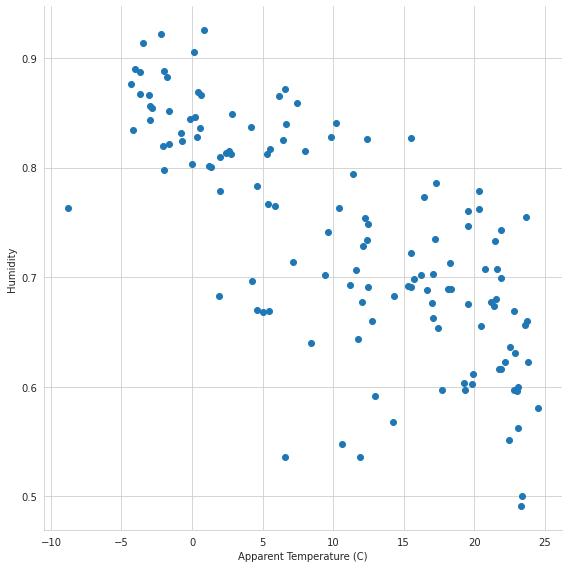

In [69]:
sns.set_style("whitegrid")
sns.FacetGrid(df_monthly_mean, size=8).map(plt.scatter, "Apparent Temperature (C)", "Humidity")
plt.show()

In [1]:
#### Observation:

There can be or may be Linear Relationship between "Humidity" and "Apparent Temperature (C)" with negative slope.

SyntaxError: invalid syntax (<ipython-input-1-64b10db90423>, line 3)

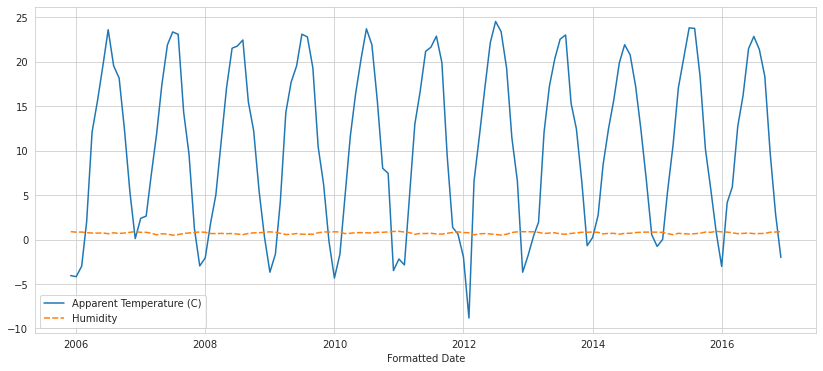

In [70]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.show()

#### Observation:

* "Humidity" is remain constant from 2006 - 2016
* But "Apparent Temperature (C)" is frequently changes from 2006 - 2016.

### Bi-variate analysis
#### 2-D Scatter plot

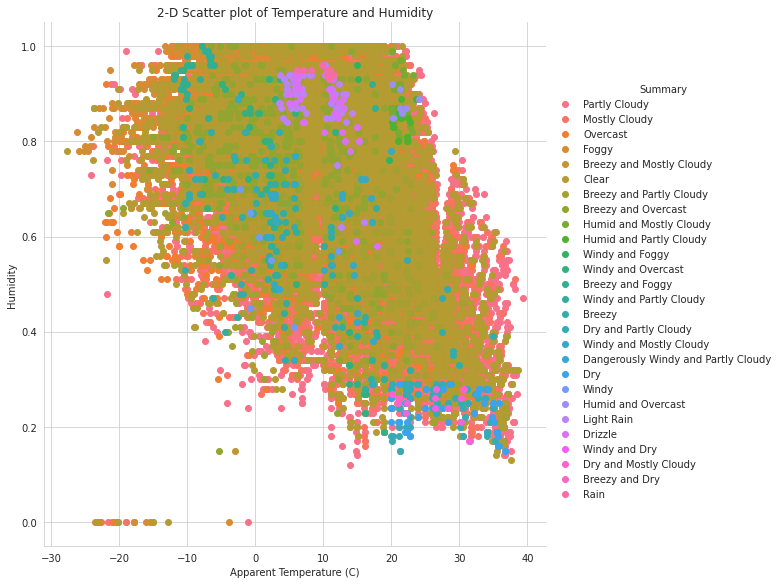

In [71]:
sns.set_style("whitegrid");
sns.FacetGrid(weather_target, hue="Summary",size=8) \
   .map(plt.scatter, "Apparent Temperature (C)", "Humidity") \
   .add_legend();
plt.title("2-D Scatter plot of Temperature and Humidity")
plt.show();

## Observation:

* There are very few outlier.
* Mostly Weather is Clear or Partly Cloudy/Rain in Finland.
* Only few days there has a Light Rain or Dry or Dangerously Windy and Partly Cloudy.


#### Univariate Analysis using PDF:

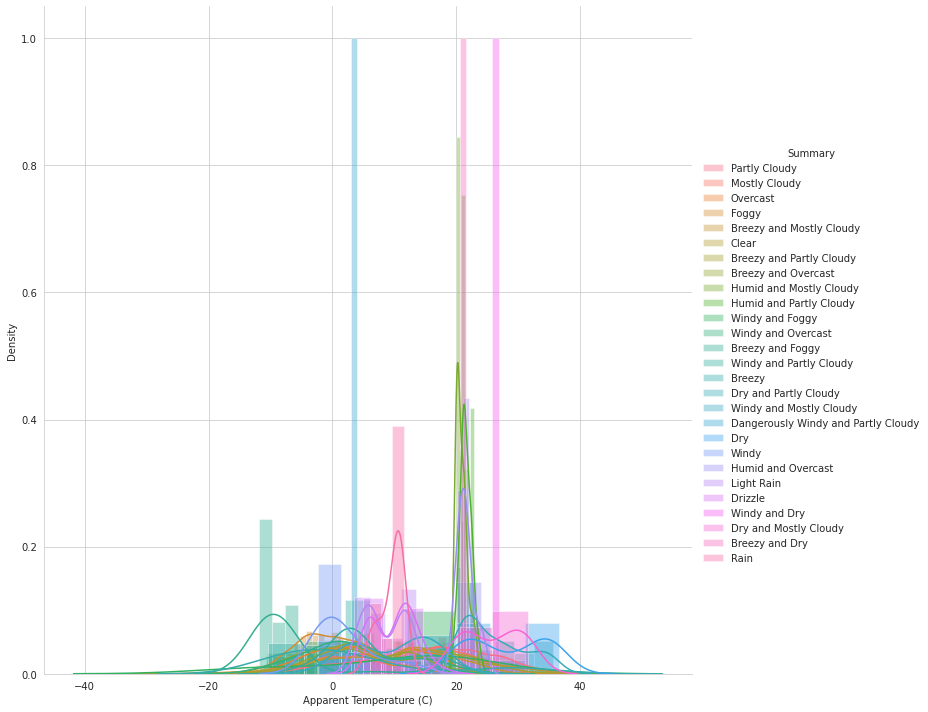

In [72]:
# For Apparent Temperature (C)
sns.FacetGrid(weather_target, hue="Summary", height=10).map(sns.distplot, "Apparent Temperature (C)").add_legend()
plt.show()

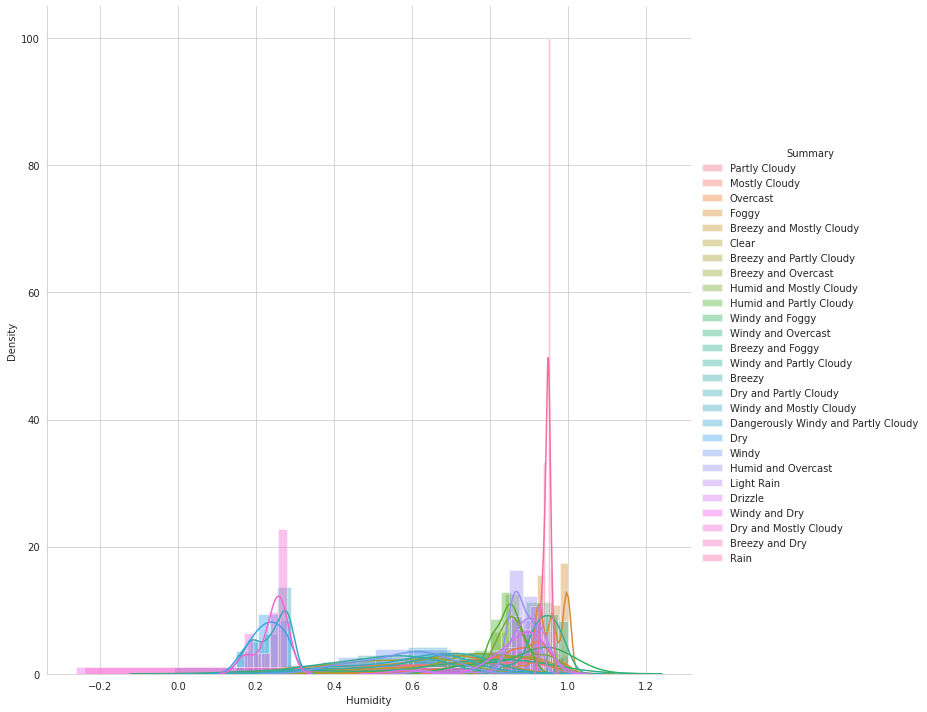

In [73]:
# For Humidity
sns.FacetGrid(weather_target, hue="Summary", height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

#### observation:

"Humidity" is better Feature than "Apparent Temperature (C)".

## Conclusion:
H0 is not accepted because there is no change in Humidity from 2006–2016. So, we will accept the H1.
